🎯 Objective
Build a machine learning model to predict whether a passenger survived the Titanic disaster (Survived: 0 = No, 1 = Yes) using features such as age, sex, class, fare, and other relevant attributes from the dataset.

This is a binary classification problem, and the goal is to learn patterns that distinguish survivors from non-survivors based on the available data.

                                                               Dataset
                                                                  |
                                                              split data
                                                            /            \
                                               Numerical_col              Categorical_col 
                                                 |                                     |
                            IMPUTATION:---------MEDIAN ---  --------  ------- --  --- MODE     
                                                 |                                     |                                              
                     Feature Selection:-------Correlation  ---  --------  -----  --   Oneway ANNOVA / Chi-sqaure test
                                                 |                                     |
                                              Outliers(IQR)                           ENCODING(L, OH)
                                                 |                                     |
                                              SCALING(N,S)  _
                                                              \                        /
                                                                 MERGE both NUM, CAT 

In [914]:
import pandas as pd
import numpy as np

In [915]:
df=pd.read_csv(r"C:\Users\NEELAM SUSHMITHA\OneDrive\Documents\RAMANASOFT INTERNSHIP\Titanic_train.csv.csv")

In [916]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [917]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [918]:
df.shape

(891, 12)

In [919]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [920]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [921]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [922]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [923]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

--------------********Splitting data***********-------------
===========================================================

In [924]:
df_num=df.select_dtypes(include=[np.number])

In [925]:
df_num.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [926]:
df_cat=df.select_dtypes(include='object')

In [927]:
df_cat.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

Missing values
--------------

In [928]:
df_num.isnull().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [929]:
df_cat.isnull().sum().sort_values(ascending=False)

Cabin       687
Embarked      2
Name          0
Sex           0
Ticket        0
dtype: int64

Imputations
--------------

In [930]:
df_num['Age'] = df_num['Age'].fillna(df_num['Age'].mean())    # filling missing values of Age column

In [931]:
df_cat['Embarked'] = df_cat['Embarked'].fillna(df_cat['Embarked'].mode()[0])     # filling missing values of Embarked column

In [932]:
df_cat.drop('Cabin', axis=1, inplace=True)  # dropping Cabin column from df due more missing values 

NOTE : Finally, null values are filled with imputation method
       The Cabin feature has ~77% missing data, making it a strong candidate for removal due to insufficient information.

In [933]:
df_num.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [934]:
df_cat.isnull().sum()

Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

**Numerical Feature selection*---Compute correlation with 'Survived'
------------------------------

In [935]:
import seaborn as sns
import matplotlib.pyplot as plt

In [936]:
df_num_corr=df_num.corr()

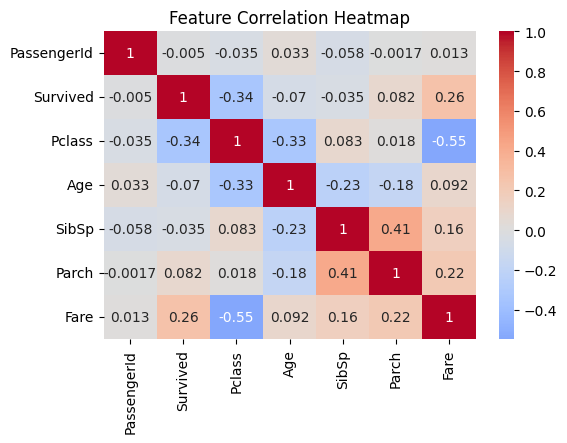

In [937]:
plt.figure(figsize=(6,4))
sns.heatmap(df_num_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [938]:
df_num_corr["Survived"].sort_values

<bound method Series.sort_values of PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64>

In [939]:
df_num_cols = []
df_num_cols.extend(df_num_corr[(df_num_corr["Survived"]>0.2)].index.values)
df_num_cols.extend(df_num_corr[(df_num_corr["Survived"]<-0.2) ].index.values)
df_num_cols

['Survived', 'Fare', 'Pclass']

C:\Users\NEELAM SUSHMITHA\AppData\Local\Temp\ipykernel_14388\1720995163.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_survived.values, y=correlation_with_survived.index, palette='coolwarm')


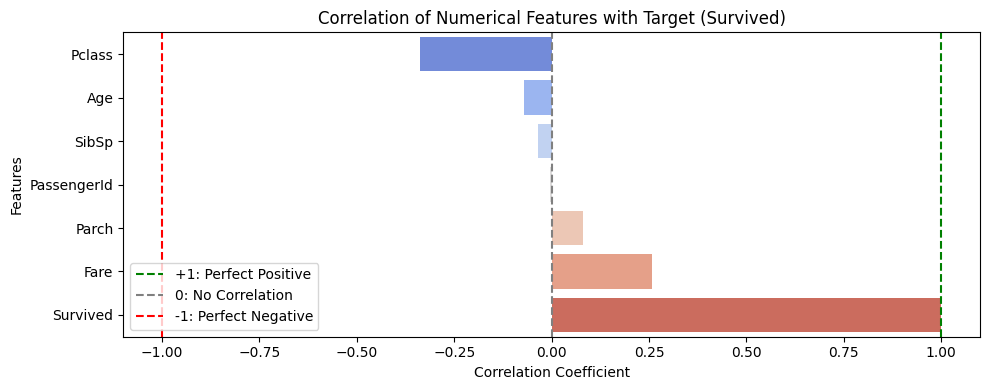

In [940]:
correlation_with_survived = df_num.corr()['Survived'].sort_values()
# Set up the plot
plt.figure(figsize=(10,4))
sns.barplot(x=correlation_with_survived.values, y=correlation_with_survived.index, palette='coolwarm')

# Draw reference lines for interpretation
plt.axvline(x=1, color='green', linestyle='--', label='+1: Perfect Positive')
plt.axvline(x=0, color='gray', linestyle='--', label='0: No Correlation')
plt.axvline(x=-1, color='red', linestyle='--', label='-1: Perfect Negative')

# Add labels and title
plt.title('Correlation of Numerical Features with Target (Survived)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [941]:
df.groupby(['Pclass', 'Sex', 'Survived'])['Fare'].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Fare, dtype: int64

In [942]:
# Pivot table: rows = Pclass & Sex, columns = Survived (0 or 1)
pivot = df.pivot_table(index=['Pclass', 'Sex'], columns='Survived', values='Fare', aggfunc='count')

pivot.columns = ['Not Survived', 'Survived']
print(pivot)

               Not Survived  Survived
Pclass Sex                           
1      female             3        91
       male              77        45
2      female             6        70
       male              91        17
3      female            72        72
       male             300        47


Outliers Treatment (IQR)
------------------------

In [943]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1               # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [944]:
columns_to_check = [
    'PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'
]

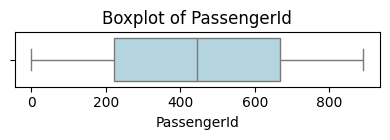

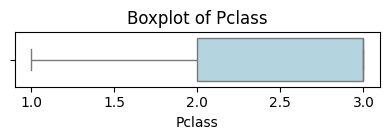

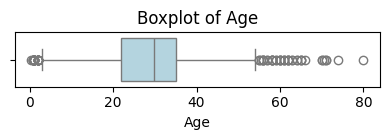

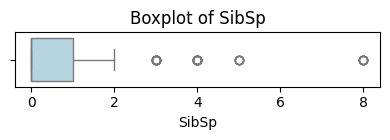

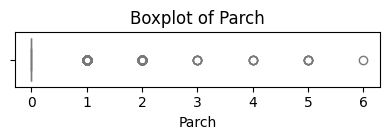

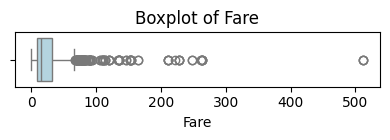

In [945]:
# Boxplot (best for outliers):
import seaborn as sns
import matplotlib.pyplot as plt

for col in columns_to_check:
    plt.figure(figsize=(4, 1.5))
    sns.boxplot(x=df_num[col], color='lightblue')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


we care most about features that affect the target (i.e., they have predictive power)

In [946]:
corr_col_to_check = ['Fare', 'Pclass']   #Highly correlated features (e.g., Pclass, Fare)  # Correlated features influence predictions 
                                                                                           ## Not all outliers are bad
df_no_outliers = remove_outliers_iqr(df_num, corr_col_to_check)   # teating ouliers to correlated columns ## To reduce distortion in prediction

print("Original DataFrame:")


print(df_num.shape)
print("\nDataFrame after Outlier Treatment:")
print(df_no_outliers.shape)

Original DataFrame:
(891, 7)

DataFrame after Outlier Treatment:
(775, 7)


 for Understanding outliers are perfromed indiviually to know the values eliminated  (SKIP)
-------------------------------------------------------------------------------------

In [947]:
# Calculate Q1, Q3, IQR, and bounds

Q1 = df_num['Fare'].quantile(0.25)
Q3 = df_num['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")


Q1 (25th percentile): 7.9104
Q3 (75th percentile): 31.0
IQR: 23.0896
Lower bound: -26.724
Upper bound: 65.6344


In [948]:
outliers = df_num[(df_num['Fare'] < lower_bound) | (df_num['Fare'] > upper_bound)]
print(f"Number of Fare and only outliers: {outliers.shape[0]}")

Number of Fare and only outliers: 116


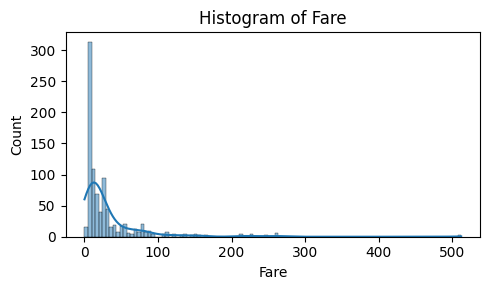

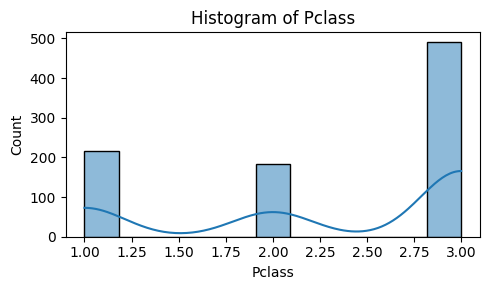

In [949]:
#Histogram (for distribution insight):
import matplotlib.pyplot as plt
import seaborn as sns

for col in corr_col_to_check:
    plt.figure(figsize=(5, 3))
    sns.histplot(df_num[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()


In [950]:
# Calculate Q1, Q3, IQR, and bounds
Q1 = df_num['Pclass'].quantile(0.25)
Q3 = df_num['Pclass'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")


Q1 (25th percentile): 2.0
Q3 (75th percentile): 3.0
IQR: 1.0
Lower bound: 0.5
Upper bound: 4.5


In [951]:
outliers = df_num[(df_num['Pclass'] < lower_bound) | (df_num['Pclass'] > upper_bound)]
print(f"Number of Pclass outliers: {outliers.shape[0]}")

Number of Pclass outliers: 0


In [952]:
# Calculate Q1, Q3, IQR, and bounds
Q1 = df_num['Age'].quantile(0.25)
Q3 = df_num['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")


Q1 (25th percentile): 22.0
Q3 (75th percentile): 35.0
IQR: 13.0
Lower bound: 2.5
Upper bound: 54.5


In [953]:
outliers = df_num[(df_num['Age'] < lower_bound) | (df_num['Age'] > upper_bound)]
print(f"Number of Age outliers: {outliers.shape[0]}")

Number of Age outliers: 66


In [954]:
# i have 66 ouliers in my dataset i am igoring it has it is not high correlated columns it cause huge data redundancy

In [955]:
print(df_num)   # in this 1 row one deleted because fare price 71 > 65

     PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare
0              1         0       3  22.000000      1      0   7.2500
1              2         1       1  38.000000      1      0  71.2833
2              3         1       3  26.000000      0      0   7.9250
3              4         1       1  35.000000      1      0  53.1000
4              5         0       3  35.000000      0      0   8.0500
..           ...       ...     ...        ...    ...    ...      ...
886          887         0       2  27.000000      0      0  13.0000
887          888         1       1  19.000000      0      0  30.0000
888          889         0       3  29.699118      1      2  23.4500
889          890         1       1  26.000000      0      0  30.0000
890          891         0       3  32.000000      0      0   7.7500

[891 rows x 7 columns]


In [956]:
print(df_no_outliers)

     PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare
0              1         0       3  22.000000      1      0   7.2500
2              3         1       3  26.000000      0      0   7.9250
3              4         1       1  35.000000      1      0  53.1000
4              5         0       3  35.000000      0      0   8.0500
5              6         0       3  29.699118      0      0   8.4583
..           ...       ...     ...        ...    ...    ...      ...
886          887         0       2  27.000000      0      0  13.0000
887          888         1       1  19.000000      0      0  30.0000
888          889         0       3  29.699118      1      2  23.4500
889          890         1       1  26.000000      0      0  30.0000
890          891         0       3  32.000000      0      0   7.7500

[775 rows x 7 columns]


In [957]:
Rows_after_oulier_treatment = 891-775
Rows_after_oulier_treatment

116

In [958]:
corr_col_to_check = ['Fare', 'Pclass']   #Highly correlated features (e.g., Pclass, Fare) 

Numerical Scaling*
----------------

In [959]:
corr_col_to_scale = ['Fare', 'Pclass']

In [960]:
columns_to_scale = ['Fare']

In [961]:
from sklearn.preprocessing import StandardScaler

In [962]:
standard_scaler = StandardScaler()
df_standard_scaled = df_no_outliers.copy()
df_standard_scaled[columns_to_scale] = standard_scaler.fit_transform(df_no_outliers[columns_to_scale])

In [963]:
df_standard_scaled.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,-0.779117
2,3,1,3,26.000000,0,0,-0.729373
3,4,1,1,35.000000,1,0,2.599828
4,5,0,3,35.000000,0,0,-0.720161
5,6,0,3,29.699118,0,0,-0.690071


Pclass Numerical columns has an Ordinal Categorical Variable i.e.,rank/order (1 = 1st class, 3 = 3rd class), not a continuous numeric feature.
To perform Scaling because these numeric values are labels, not measurements.

In [964]:
df_cat1=pd.concat([df_cat,pd.DataFrame(df_num['Survived'])],axis=1)

In [965]:
df_cat1

,Name,Sex,Ticket,Embarked,Survived
0,"Braund, Mr. Owen Harris",male,A/5 21171,S,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,1
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,1
4,"Allen, Mr. William Henry",male,373450,S,0
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S,0
887,"Graham, Miss. Margaret Edith",female,112053,S,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S,0
889,"Behr, Mr. Karl Howell",male,111369,C,1


In [966]:
df_num.drop(['Survived'],axis=1,inplace=True)

In [967]:
df_num

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.000000,1,0,7.2500
1,2,1,38.000000,1,0,71.2833
2,3,3,26.000000,0,0,7.9250
3,4,1,35.000000,1,0,53.1000
4,5,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000
887,888,1,19.000000,0,0,30.0000
888,889,3,29.699118,1,2,23.4500
889,890,1,26.000000,0,0,30.0000


Categorical feature selection
------------------------------

The Chi-square test (chi2_contingency in Python) helps us test whether two categorical variables are independent, or related.

❌Null Hypothesis (H₀): The two variables are dependent (relationship).

                  (H₀): p-value < 0.05 → Reject H₀ → There is a relationship between the variables 

✅Alternate Hypothesis (H₁): The two variables are independent (no relationship).

                  (H₁): p-value ≥ 0.05 → Fail to reject H₀ → Variables are independent

In [968]:
df_cat1.columns

Index(['Name', 'Sex', 'Ticket', 'Embarked', 'Survived'], dtype='object')

In [969]:
df_cat.columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [970]:
from scipy.stats import chi2_contingency
for col in df_cat:
    contingency = pd.crosstab(df[col], df['Survived'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{col}: p-value = {p}")

Name: p-value = 0.484248151973633
Sex: p-value = 1.1973570627755645e-58
Ticket: p-value = 0.011527296011637747
Embarked: p-value = 1.769922284120912e-06


| **Variable** | **p-value**  | **Statistical Significance**  | **Interpretation**                                           |
| ------------ | ------------ | ----------------------------  |  ------------------------------------------------------------|
| **Name**     | 0.484        | ❌ Significant (calculation)  | It is in string and more unique name               |
| **Sex**      | 1.19 × 10⁻⁵⁸ | ✅ Very Strongly Significant  | Strong association with survival (Sex matters a lot)         |
| **Ticket**   | 0.0115       | ❌  InSignificant             | No  association with survival                               |
| **Embarked** | 1.77 × 10⁻⁶  | ✅ Strongly Significant       |Strong association with survival (boarding location matters)  |


In [971]:
# Extract Title from the Name column in df_cat
df_cat['Title'] = df_cat['Name'].str.extract(r',\s*([^\.]*)\.')
# Check value counts of extracted titles
print(df_cat['Title'].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


🔍 What is a Cross-tabulation (pd.crosstab)?

A cross-tabulation is a table (matrix) that displays the frequency (count) of observations across combinations of two or more categorical variables. It’s extremely useful for summarizing categorical data and observing relationships or distributions.

In [972]:
# Cross-tabulation(Title vs Sex, grouped by Embarked)
who_is_who = pd.crosstab(index=[df_cat1['Embarked'], df_cat1['Survived'], df_cat['Title']], columns=df_cat1['Sex'])
print(who_is_who)

Sex                             female  male
Embarked Survived Title                     
C        0        Don                0     1
                  Dr                 0     1
                  Miss               6     0
                  Mr                 0    64
                  Mrs                3     0
         1        Col                0     1
                  Dr                 0     1
                  Lady               1     0
                  Master             0     5
                  Miss              32     0
                  Mlle               2     0
                  Mme                1     0
                  Mr                 0    21
                  Mrs               28     0
                  Sir                0     1
Q        0        Dr                 0     1
                  Master             0     4
                  Miss               7     0
                  Mr                 0    32
                  Mrs                2     0
          

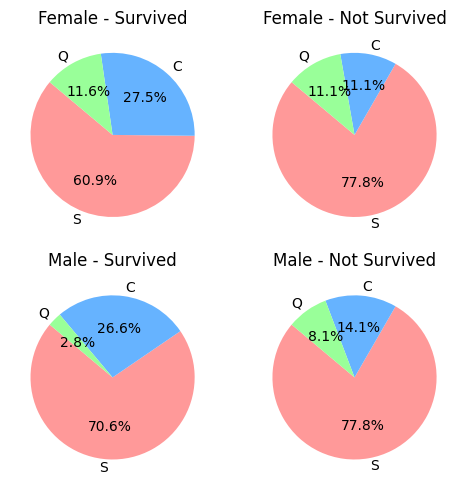

In [973]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter and group data for each combination
female_survived = df_cat1[(df_cat1['Sex'] == 'female') & (df_cat1['Survived'] == 1)]['Embarked'].value_counts()
female_not_survived = df_cat1[(df_cat1['Sex'] == 'female') & (df_cat1['Survived'] == 0)]['Embarked'].value_counts()
male_survived = df_cat1[(df_cat1['Sex'] == 'male') & (df_cat1['Survived'] == 1)]['Embarked'].value_counts()
male_not_survived = df_cat1[(df_cat1['Sex'] == 'male') & (df_cat1['Survived'] == 0)]['Embarked'].value_counts()

# Create pie charts
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

colors = ['#ff9999','#66b3ff','#99ff99']

# Female Survived
axs[0, 0].pie(female_survived, labels=female_survived.index, autopct='%1.1f%%',
              startangle=140, colors=colors)
axs[0, 0].set_title('Female - Survived')

# Female Not Survived
axs[0, 1].pie(female_not_survived, labels=female_not_survived.index, autopct='%1.1f%%',
              startangle=140, colors=colors)
axs[0, 1].set_title('Female - Not Survived')

# Male Survived
axs[1, 0].pie(male_survived, labels=male_survived.index, autopct='%1.1f%%',
              startangle=140, colors=colors)
axs[1, 0].set_title('Male - Survived')

# Male Not Survived
axs[1, 1].pie(male_not_survived, labels=male_not_survived.index, autopct='%1.1f%%',
              startangle=140, colors=colors)
axs[1, 1].set_title('Male - Not Survived')

plt.tight_layout()
plt.show()

A contingency table (cross-tabulation or crosstab)is a type of table in statistics that shows the frequency distribution of two categorical variables.

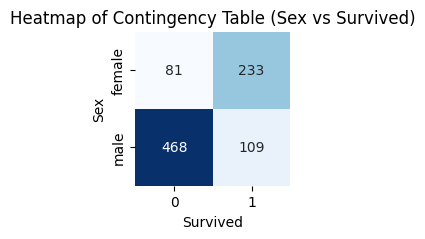

In [974]:
import seaborn as sns

# Plotting the contingency table for 'Sex' vs 'Survived'
contingency_sex = pd.crosstab(df['Sex'], df['Survived'])

# Plot a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(contingency_sex, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Heatmap of Contingency Table (Sex vs Survived)')
plt.ylabel('Sex')
plt.xlabel('Survived')
plt.show()

ENCODING 
----------

In [975]:
df_cat2= df[['Sex','Embarked']]

In [976]:
from sklearn.preprocessing import OneHotEncoder

In [977]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoded_array = encoder.fit_transform(df_cat2)
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(df_cat2.columns))
encoded_df.shape

(891, 6)

In [978]:
encoded_df

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0
887,1.0,0.0,0.0,0.0,1.0,0.0
888,1.0,0.0,0.0,0.0,1.0,0.0
889,0.0,1.0,1.0,0.0,0.0,0.0


MERGE
-----

In [979]:
#merge
df_final_cat=encoded_df.loc[df_no_outliers.index,:]
final_df=pd.concat([df_standard_scaled,df_final_cat],axis=1)
final_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,22.000000,1,0,-0.779117,0.0,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,-0.729373,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1,1,35.000000,1,0,2.599828,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0,3,35.000000,0,0,-0.720161,0.0,1.0,0.0,0.0,1.0,0.0
5,6,0,3,29.699118,0,0,-0.690071,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,-0.355367,0.0,1.0,0.0,0.0,1.0,0.0
887,888,1,1,19.000000,0,0,0.897459,1.0,0.0,0.0,0.0,1.0,0.0
888,889,0,3,29.699118,1,2,0.414752,1.0,0.0,0.0,0.0,1.0,0.0
889,890,1,1,26.000000,0,0,0.897459,0.0,1.0,1.0,0.0,0.0,0.0


In [980]:
final_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_nan'],
      dtype='object')

In [981]:
def decode_embarked(row):
    if row['Embarked_C'] == 1:
        return 'C'
    elif row['Embarked_Q'] == 1:
        return 'Q'
    elif row['Embarked_S'] == 1:
        return 'S'
    else:
        return 'Unknown'

def decode_sex(row):
    if row['Sex_female'] == 1:
        return 'female'
    elif row['Sex_male'] == 1:
        return 'male'
    else:
        return 'Unknown'

# Create new columns
final_df['Embarked'] = final_df.apply(decode_embarked, axis=1)
final_df['Sex'] = final_df.apply(decode_sex, axis=1)

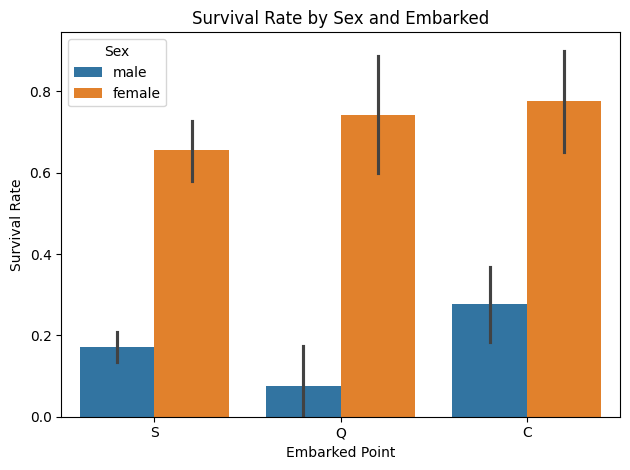

In [982]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create bar plot
sns.barplot(data=final_df, x='Embarked', y='Survived', hue='Sex')
plt.title('Survival Rate by Sex and Embarked')
plt.ylabel('Survival Rate')
plt.xlabel('Embarked Point')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


Input and Target variables
--------------------------

In [983]:
X = final_df.drop('Survived', axis=1)
y = final_df['Survived']

In [984]:
X.columns   # independent and input variable

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan',
       'Embarked', 'Sex'],
      dtype='object')

In [985]:
y  # dependent and Target variables

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 775, dtype: int64

In [986]:
y.name

'Survived'

In [987]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [988]:
df = df.drop(['Name', 'Ticket', 'Cabin', 'Age'], axis=1, errors='ignore') #These columns are either non-numeric or have missing data or are less useful for your model.

df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)# Sex and Embarked are categorical, so you use one-hot encoding to convert them into numeric columns.

y = df_encoded['Survived']
X = df_encoded.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Train-Test Split

Logistic Regression:
--------------------
A simple statistical model used for binary classification that estimates the probability of an outcome (like survived/not survived) using a logistic function.

In [989]:
#  Training Logistic Regression Model
model = LogisticRegression(max_iter=1000) #For every iteration (up to 1000),  where the model learns and adjusts to improve predictions.
                                          #the model tries to adjust its parameters (like weights) to better predict whether a passenger survived or not.
model.fit(X_train, y_train)  # “Train the model using the data you give.”

LogisticRegression(max_iter=1000)

In [990]:
model.score(X_train, y_train)  #It tells you how well your model learned during training.

0.8089887640449438

Decision Tree:
---------------
A flowchart-like model that splits data into branches based on feature values to make predictions, easy to interpret but can overfit.

In [991]:
from sklearn.tree import DecisionTreeClassifier

In [992]:
DecTree=DecisionTreeClassifier()  #  creating a new decision tree model for regression # using it to train (fit) on data and make predictions.

In [993]:
dt_M=DecTree.fit(X_train,y_train)  #training  #teaching your decision tree model using your training data.

In [994]:
dt_M.score(X_train,y_train)   #returns the accuracy (percentage of correct predictions).

1.0

Random Forest:
--------------
An ensemble of many decision trees where each tree votes for the final prediction, improving accuracy and reducing overfitting.

In [995]:
from sklearn.ensemble import RandomForestClassifier

In [996]:
RandFor=RandomForestClassifier(n_estimators=5000) #You are building a "forest" of 5000 decision trees to help make predictions by averaging their results.

In [997]:
rf_M=RandFor.fit(X_train,y_train)  #training

In [998]:
rf_M.score(X_train,y_train)

1.0

|             | Model Performance |      Meaning                   |
| ----------- | ----------------- | ------------------------------ |
| 0.90 - 1.0  | Excellent         | Model predicts very accurately |
| 0.70 - 0.89 | Good              | Model is doing well            |
| 0.50 - 0.69 | Moderate          | Model is okay, some errors     |
| 0.30 - 0.49 | Poor              | Model misses quite a bit       |
| < 0.30      | Very Poor         | Model predictions are weak     |

Boosting:
---------
Boosting is an ensemble learning technique used to convert weak learners into strong learners.
It does this by training models sequentially, each one trying to correct the errors of the previous one.

AdaBoost Classifier:
--------------------
AdaBoost (Adaptive Boosting)
Adjusts weights of misclassified instances.
Uses exponential loss function.
Suitable for binary classification.
Base learners are often decision stumps.

The score ranges from 0 to 1 (sometimes can be negative if very bad).
Closer to 1 means the model explains most of the variation in the target.
Closer to 0 means the model doesn’t explain much.

GradientBoosting Classifier:
---------------------------
Adjusts weights of misclassified instances.
Uses exponential loss function.
Suitable for binary classification.
Base learners are often decision stumps.

XGB Classifier:
--------------
Learners are added sequentially to minimize a loss function.
Uses gradient descent to optimize.
More flexible than AdaBoost.
Can use different loss functions (log loss, MSE, etc.).

In [999]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Model initialization
RandFor = RandomForestClassifier(n_estimators=500)

# Model training
rf = RandFor.fit(X_train, y_train)

# Training score
training_score_rf = rf.score(X_train, y_train)
print("rf_training_score:", training_score_rf)

# Prediction
y_pred_rf = rf.predict(X_test)

# Evaluation
testing_score_rf = accuracy_score(y_test, y_pred_rf)
print("rf_testing_score:", testing_score_rf)


rf_training_score: 1.0
rf_testing_score: 0.8044692737430168


In [1000]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Model initialization
GBM = GradientBoostingClassifier(n_estimators=300)

# Model training
gbm = GBM.fit(X_train, y_train)

# Training score
training_score_gbm = gbm.score(X_train, y_train)
print("gbm_training_score:", training_score_gbm)

# Prediction
y_pred_gbm = gbm.predict(X_test)

# Evaluation
testing_score_gbm = accuracy_score(y_test, y_pred_gbm)
print("gbm_testing_score:", testing_score_gbm)

gbm_training_score: 0.9719101123595506
gbm_testing_score: 0.7988826815642458


Metrics
-------

| **Metric**               | **Formula**                                                                                           | **Why It's Important**                                          |
| ------------------------ | ----------------------------------------------------------------------------------------------------- | --------------------------------------------------------------- |
| **Accuracy**             | $\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$                                                 | Quick overall performance check                                 |
| **Precision**            | $\text{Precision} = \frac{TP}{TP + FP}$                                                               | Avoids false alarms — useful if acting on predictions is costly |
| **Recall** (Sensitivity) | $\text{Recall} = \frac{TP}{TP + FN}$                                                                  | Catches as many actual positives (e.g., survivors) as possible  |
| **F1-score**             | $\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$ | Balances precision and recall — ideal for imbalanced data       |
| **Confusion Matrix**     | $\begin{bmatrix} TP & FP \\ FN & TN \end{bmatrix}$                                                    | Visual and interpretable overview of model behavior             |


In [1001]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [1002]:
# Example: Evaluate on Logistic Regression
# Predict
y_pred = model.predict(X_test)

In [1003]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.776536312849162
Precision: 0.7361111111111112
Recall: 0.7162162162162162
F1 Score: 0.726027397260274


In [1004]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

|  Confusion Matrix       m      | **Predicted: Survived (1)** | **Predicted: Not Survived (0)** |
| -------------------------------| --------------------------- | ------------------------------- |
| **Actual: Survived (1)**       |     True Positive (TP)      |      False Negative (FN)        |
| **Actual: Not Survived (0)**   |     False Positive (FP)     |      True Negative (TN)         |

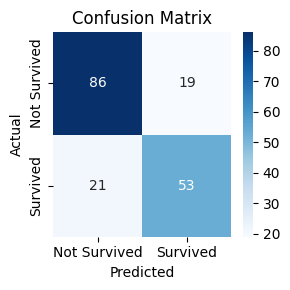

In [1005]:
# Plot Confusion Matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

| Metric / Method  | Why It Matters                                                   |
| ---------------- | ---------------------------------------------------------------- |
| ROC Curve + AUC  | Measures model’s discrimination across all thresholds            |
| Log Loss         | Measures confidence/calibration of predicted probabilities       |
| Cross-Validation | More reliable, stable performance estimates over multiple splits |


In [1006]:
from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

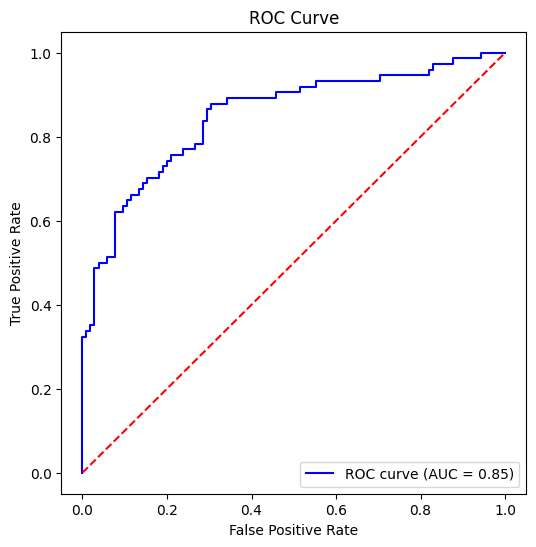

AUC: 0.8497


In [1007]:
# Assuming model is already trained: model.fit(X_train, y_train)

# 1. ROC Curve and AUC
y_probs = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.4f}')

In [1008]:
# 2. Log Loss
y_pred_probs = model.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_probs)
print(f'Log Loss: {logloss:.4f}')

Log Loss: 0.4533


In [1009]:
# 3. Cross-Validation Scores (using StratifiedKFold for balanced splits)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores):.4f}')

Cross-Validation Accuracy Scores: [0.76536313 0.7752809  0.79775281 0.78089888 0.82022472]
Mean CV Accuracy: 0.7879


In [1010]:
# Detailed Classification Report (Optional)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Not Survived", "Survived"]))



Classification Report:

              precision    recall  f1-score   support

Not Survived       0.80      0.82      0.81       105
    Survived       0.74      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [1011]:
import os
os.environ['GIT_PYTHON_REFRESH']='quiet'
os.environ['MLFLOW_TRACKING_URI']='file:///C:/Users/NEELAM SUSHMITHA/Downloads/MLopsTitanic'

In [1012]:
X = final_df.drop(['Survived'], axis=1)
y = final_df['Survived']

In [1013]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50,stratify=y)

In [1014]:
import mlflow

In [1015]:
mlflow.set_experiment("Titanic-default-analysis")
mlflow.set_experiment_tag('Titanic-def-tag','ex1')

In [1016]:
# Step 1: One-hot encode categorical variables in X
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 2: Train-test split (if not already done)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 3: Fit models (no change needed here)
RandFor = RandomForestClassifier(n_estimators=5000, max_depth=6)
rf = RandFor.fit(X_train, y_train)

In [1017]:
with mlflow.start_run():    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.metrics import r2_score,accuracy_score
    
    # model object initialization
    RandFor=RandomForestClassifier(n_estimators=5000,max_depth=6)
    GBM=GradientBoostingClassifier(n_estimators=3000,max_depth=6,learning_rate=0.01,min_samples_split=5)
    rf_n_estimators=5000
    #logging parameters
    mlflow.log_param("n_estimators",rf_n_estimators)
    mlflow.log_param('rf_max_depth',6)
    mlflow.log_param('gbm_n_estimators',3000)
    mlflow.log_param('gbm_max_depth',6)
    mlflow.log_param('gbm_learning_rate',0.01)
    mlflow.log_param('gbm_minimum_samples_split',5)
    
    #training models
    rf=RandFor.fit(X_train,y_train)
    gbm=GBM.fit(X_train,y_train)
    
    #training scores
    training_score_rf=RandFor.score(X_train,y_train)
    training_score_gbm=GBM.score(X_train,y_train)
    
    #logging training score
    mlflow.log_metric("rf_training_score", training_score_rf)
    mlflow.log_metric("gbm_training_score",training_score_gbm)
    
    #value predictions
    y_pred_rf=rf.predict(X_test)
    y_pred_gbm=gbm.predict(X_test)
    
    #prediction evaluations
    testing_score_rf=accuracy_score(y_pred_rf,y_test)
    testing_score_gbm=accuracy_score(y_pred_gbm,y_test)
    
    #logging evaluation scores
    mlflow.log_metric("rf_testing_score", testing_score_rf)
    mlflow.log_metric("gbm_testing_score",testing_score_gbm)
    
    #logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")
    mlflow.set_tag("iteration_name", "test_rf_gb_sklearn")
    mlflow.set_tag("feature_set_version", "Titanic default")

2025/05/23 10:33:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/23 10:34:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [1019]:
#port setting at 8002 for random-forest-model

In [1018]:
import requests
import json

#data = {"columns": iris.feature_names, "data": [[6.1, 2.8, 4.7, 1.2]]}
data = {'dataframe_records': X_test.values.tolist()}
headers = {"Content-Type": "application/json"}

response = requests.post("http://localhost:8002/invocations", data=json.dumps(data), headers=headers)
predictions = response.json()

print(predictions)

{'predictions': [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]}
